## Gruppenprojekt Marketing Analytics

Eingereicht von Roya Abdel Nasser, Karar Ghawami, Alexandra Gohr & Natalie Schwientek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
import datetime as dt
from statsmodels.tsa.seasonal import STL

%matplotlib inline
sns.set(rc={'figure.figsize':(20,10)})

In [3]:
# Dateipfad einstellen
# import os
# os.chdir('C:\\Users\\natal\OneDrive\Dokumente\GitHub\Gruppenprojekt-Marketing-Analytics')

In [5]:
dtypes_calendar_data = {
    'week_id' : 'int',
    'event_type_1' : 'category',
    'event_type_2' : 'category'
}

dtypes_prices_data = {
    'week_id' : 'int',
    'item_id' : 'category',
    'price' : 'float64'  
}

dtypes_sales_data = {
    'week_id' : 'int',
    'dept_id' : 'category',
    'cat_id' : 'category',
    'sales' : 'int',
    'item_id' : 'category'
}


calendar_data = pd.read_csv("calendar.csv",parse_dates = ['date'], dtype = dtypes_calendar_data)
prices_data = pd.read_csv("prices.csv", dtype = dtypes_prices_data)
sales_data = pd.read_csv("sales.csv", parse_dates = ['date'], dtype = dtypes_sales_data)

display(calendar_data.head())
display(calendar_data.info())
display(prices_data.head())
display(prices_data.info())
display(sales_data.head())
display(sales_data.info())

,date,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap
0,2011-02-01,11101,NaN,NaN,NaN,NaN,1
1,2011-02-02,11101,NaN,NaN,NaN,NaN,1
2,2011-02-03,11101,NaN,NaN,NaN,NaN,1
3,2011-02-04,11101,NaN,NaN,NaN,NaN,1
4,2011-02-05,11102,NaN,NaN,NaN,NaN,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1886 non-null   datetime64[ns]
 1   week_id       1886 non-null   int32         
 2   event_name_1  154 non-null    object        
 3   event_type_1  154 non-null    category      
 4   event_name_2  4 non-null      object        
 5   event_type_2  4 non-null      category      
 6   snap          1886 non-null   int64         
dtypes: category(2), datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 70.3+ KB


None

,Unnamed: 0,item_id,week_id,price
0,0,HOBBIES_1_001,11325,9.58
1,1,HOBBIES_1_001,11326,9.58
2,2,HOBBIES_1_001,11327,8.26
3,3,HOBBIES_1_001,11328,8.26
4,4,HOBBIES_1_001,11329,8.26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661824 entries, 0 to 661823
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Unnamed: 0  661824 non-null  int64   
 1   item_id     661824 non-null  category
 2   week_id     661824 non-null  int32   
 3   price       661824 non-null  float64 
dtypes: category(1), float64(1), int32(1), int64(1)
memory usage: 14.0 MB


None

,date,item_id,dept_id,cat_id,sales
0,2011-02-01,HOBBIES_1_001,HOBBIES_1,HOBBIES,0
1,2011-02-01,HOBBIES_1_002,HOBBIES_1,HOBBIES,0
2,2011-02-01,HOBBIES_1_003,HOBBIES_1,HOBBIES,0
3,2011-02-01,HOBBIES_1_004,HOBBIES_1,HOBBIES,0
4,2011-02-01,HOBBIES_1_005,HOBBIES_1,HOBBIES,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5652846 entries, 0 to 5652845
Data columns (total 5 columns):
 #   Column   Dtype         
---  ------   -----         
 0   date     datetime64[ns]
 1   item_id  category      
 2   dept_id  category      
 3   cat_id   category      
 4   sales    int32         
dtypes: category(3), datetime64[ns](1), int32(1)
memory usage: 86.3 MB


None

In [6]:
merged_data = pd.merge(sales_data, calendar_data, on= "date")
merged_data.head()

,date,item_id,dept_id,cat_id,sales,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap
0,2011-02-01,HOBBIES_1_001,HOBBIES_1,HOBBIES,0,11101,NaN,NaN,NaN,NaN,1
1,2011-02-01,HOBBIES_1_002,HOBBIES_1,HOBBIES,0,11101,NaN,NaN,NaN,NaN,1
2,2011-02-01,HOBBIES_1_003,HOBBIES_1,HOBBIES,0,11101,NaN,NaN,NaN,NaN,1
3,2011-02-01,HOBBIES_1_004,HOBBIES_1,HOBBIES,0,11101,NaN,NaN,NaN,NaN,1
4,2011-02-01,HOBBIES_1_005,HOBBIES_1,HOBBIES,0,11101,NaN,NaN,NaN,NaN,1


In [7]:
full_data = pd.merge(merged_data, prices_data, on= ["week_id", "item_id"])

display(full_data.info())
display(full_data.head(100))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4528539 entries, 0 to 4528538
Data columns (total 13 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   item_id       category      
 2   dept_id       category      
 3   cat_id        category      
 4   sales         int32         
 5   week_id       int32         
 6   event_name_1  object        
 7   event_type_1  category      
 8   event_name_2  object        
 9   event_type_2  category      
 10  snap          int64         
 11  Unnamed: 0    int64         
 12  price         float64       
dtypes: category(5), datetime64[ns](1), float64(1), int32(2), int64(2), object(2)
memory usage: 302.4+ MB


None

,date,item_id,dept_id,cat_id,sales,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,Unnamed: 0,price
0,2011-02-01,HOBBIES_1_008,HOBBIES_1,HOBBIES,0,11101,NaN,NaN,NaN,NaN,1,1512,0.46
1,2011-02-02,HOBBIES_1_008,HOBBIES_1,HOBBIES,0,11101,NaN,NaN,NaN,NaN,1,1512,0.46
2,2011-02-03,HOBBIES_1_008,HOBBIES_1,HOBBIES,4,11101,NaN,NaN,NaN,NaN,1,1512,0.46
3,2011-02-04,HOBBIES_1_008,HOBBIES_1,HOBBIES,6,11101,NaN,NaN,NaN,NaN,1,1512,0.46
4,2011-02-01,HOBBIES_1_009,HOBBIES_1,HOBBIES,3,11101,NaN,NaN,NaN,NaN,1,1794,1.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2011-02-04,HOBBIES_1_076,HOBBIES_1,HOBBIES,1,11101,NaN,NaN,NaN,NaN,1,17276,2.94
96,2011-02-01,HOBBIES_1_078,HOBBIES_1,HOBBIES,0,11101,NaN,NaN,NaN,NaN,1,17781,11.97
97,2011-02-02,HOBBIES_1_078,HOBBIES_1,HOBBIES,0,11101,NaN,NaN,NaN,NaN,1,17781,11.97
98,2011-02-03,HOBBIES_1_078,HOBBIES_1,HOBBIES,0,11101,NaN,NaN,NaN,NaN,1,17781,11.97


In [8]:
full_data.set_index(['date'], inplace = True)
full_data.sort_index(axis = 0, ascending = True, inplace = True)
display(full_data.head(10))

,item_id,dept_id,cat_id,sales,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,Unnamed: 0,price
date,,,,,,,,,,,,
2011-02-01,HOBBIES_1_008,HOBBIES_1,HOBBIES,0,11101,NaN,NaN,NaN,NaN,1,1512,0.46
2011-02-01,FOODS_2_207,FOODS_2,FOODS,0,11101,NaN,NaN,NaN,NaN,1,467458,6.84
2011-02-01,HOUSEHOLD_1_327,HOUSEHOLD_1,HOUSEHOLD,1,11101,NaN,NaN,NaN,NaN,1,200374,0.94
2011-02-01,FOODS_2_208,FOODS_2,FOODS,0,11101,NaN,NaN,NaN,NaN,1,467740,6.98
2011-02-01,FOODS_2_211,FOODS_2,FOODS,1,11101,NaN,NaN,NaN,NaN,1,468152,2.64
2011-02-01,HOUSEHOLD_1_325,HOUSEHOLD_1,HOUSEHOLD,0,11101,NaN,NaN,NaN,NaN,1,199811,3.32
2011-02-01,FOODS_2_212,FOODS_2,FOODS,4,11101,NaN,NaN,NaN,NaN,1,468434,4.18
2011-02-01,HOUSEHOLD_1_324,HOUSEHOLD_1,HOUSEHOLD,0,11101,NaN,NaN,NaN,NaN,1,199529,5.97
2011-02-01,FOODS_2_218,FOODS_2,FOODS,1,11101,NaN,NaN,NaN,NaN,1,469570,3.25


In [9]:
full_data_clean = full_data.drop("Unnamed: 0", axis=1)
full_data_clean.head()

,item_id,dept_id,cat_id,sales,week_id,event_name_1,event_type_1,event_name_2,event_type_2,snap,price
date,,,,,,,,,,,
2011-02-01,HOBBIES_1_008,HOBBIES_1,HOBBIES,0,11101,NaN,NaN,NaN,NaN,1,0.46
2011-02-01,FOODS_2_207,FOODS_2,FOODS,0,11101,NaN,NaN,NaN,NaN,1,6.84
2011-02-01,HOUSEHOLD_1_327,HOUSEHOLD_1,HOUSEHOLD,1,11101,NaN,NaN,NaN,NaN,1,0.94
2011-02-01,FOODS_2_208,FOODS_2,FOODS,0,11101,NaN,NaN,NaN,NaN,1,6.98
2011-02-01,FOODS_2_211,FOODS_2,FOODS,1,11101,NaN,NaN,NaN,NaN,1,2.64


In [10]:
#data = pd.get_dummies(data, columns = ['Month'], drop_first = False)
#Week_id entfernen und wochentage neu codieren
#Umsatzspalte mit multiplikation von Sales un Price durchführen, dann erst aufaggregieren?
#aggregation nach datum vorher sinnvoll? 

data = pd.get_dummies(full_data_clean, columns = ['cat_id', 'event_name_1','event_type_1','event_name_2','event_type_2'], drop_first = False)
data['Month'] = data.index.month_name()
data.head()

,item_id,dept_id,sales,week_id,snap,price,cat_id_FOODS,cat_id_HOBBIES,cat_id_HOUSEHOLD,event_name_1_Chanukah End,...,event_type_1_National,event_type_1_Religious,event_type_1_Sporting,event_name_2_Cinco De Mayo,event_name_2_Easter,event_name_2_Father's day,event_name_2_OrthodoxEaster,event_type_2_Cultural,event_type_2_Religious,Month
date,,,,,,,,,,,,,,,,,,,,,
2011-02-01,HOBBIES_1_008,HOBBIES_1,0,11101,1,0.46,0,1,0,0,...,0,0,0,0,0,0,0,0,0,February
2011-02-01,FOODS_2_207,FOODS_2,0,11101,1,6.84,1,0,0,0,...,0,0,0,0,0,0,0,0,0,February
2011-02-01,HOUSEHOLD_1_327,HOUSEHOLD_1,1,11101,1,0.94,0,0,1,0,...,0,0,0,0,0,0,0,0,0,February
2011-02-01,FOODS_2_208,FOODS_2,0,11101,1,6.98,1,0,0,0,...,0,0,0,0,0,0,0,0,0,February
2011-02-01,FOODS_2_211,FOODS_2,1,11101,1,2.64,1,0,0,0,...,0,0,0,0,0,0,0,0,0,February


In [11]:
# Tagesabsatz (=sales) aggregieren für die Visualisierung
data_agg = data.resample('D').sum()
data_agg = data_agg[['sales']]
print(data_agg)

            sales
date             
2011-02-01   3051
2011-02-02   2630
2011-02-03   3276
2011-02-04   3450
2011-02-05   5437
...           ...
2016-02-24   3369
2016-02-25   3396
2016-02-26   4087
2016-02-27   5329
2016-02-28   6198

[1854 rows x 1 columns]


<AxesSubplot:xlabel='date', ylabel='sales'>

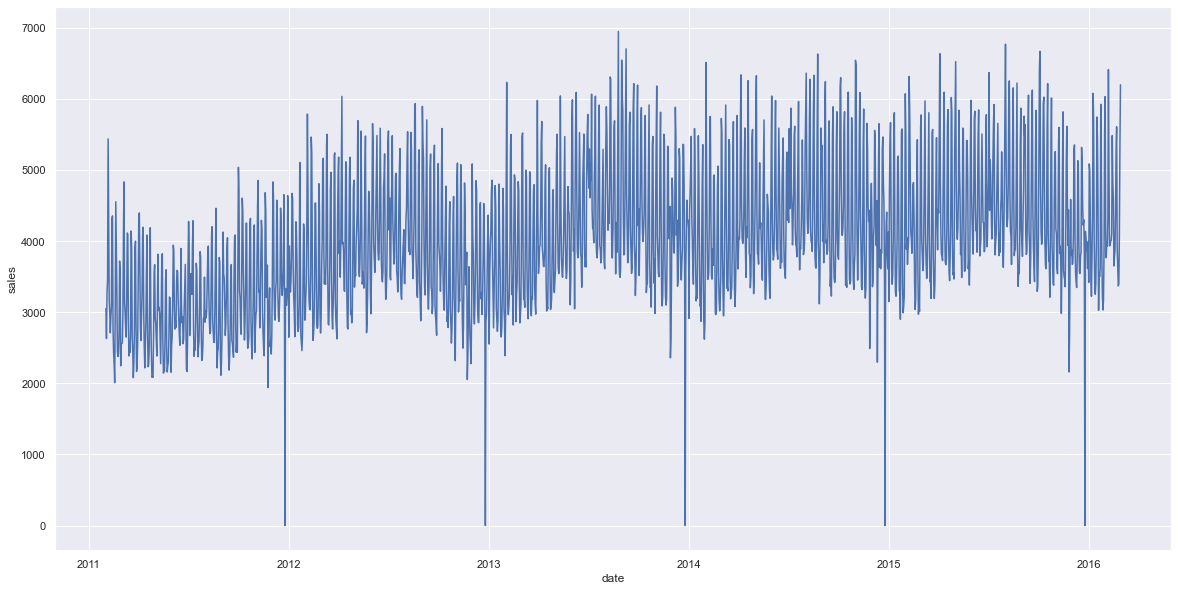

In [12]:
# Sales im Zeitverlauf
sns.lineplot(x = 'date', y = 'sales', data = data_agg, estimator = 'mean')

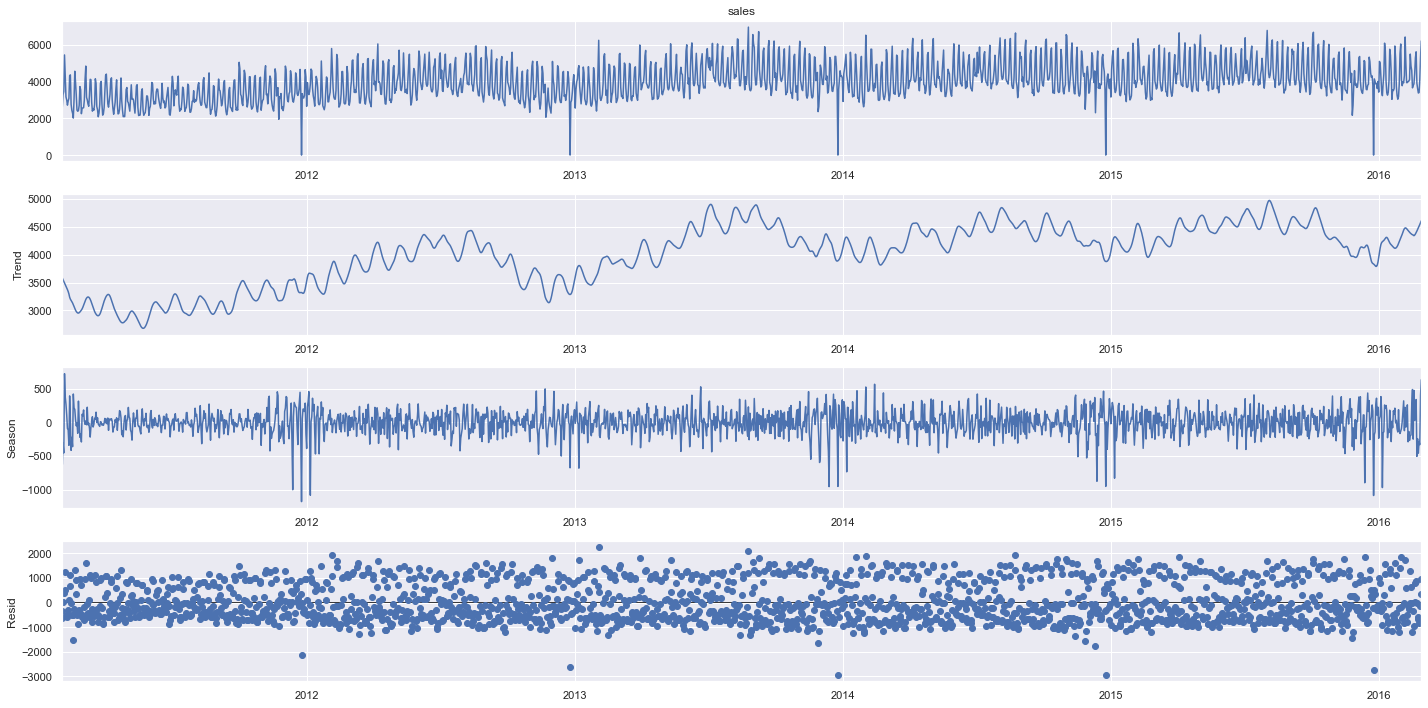

In [13]:
decompose = STL(data_agg['sales'], period=12).fit()
decompose.plot()
plt.show()

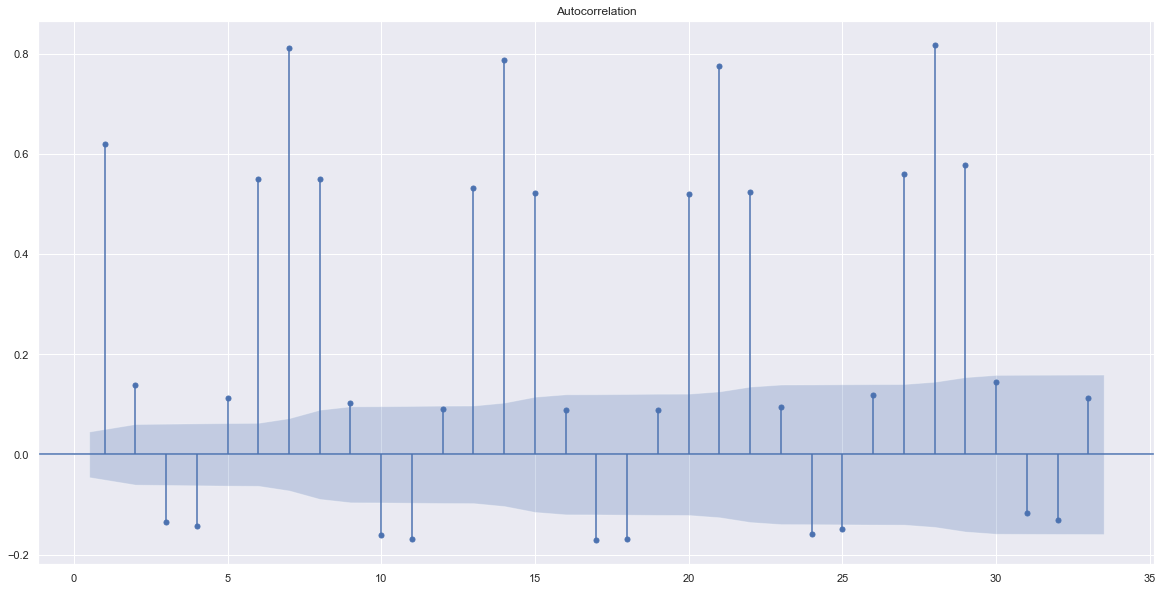

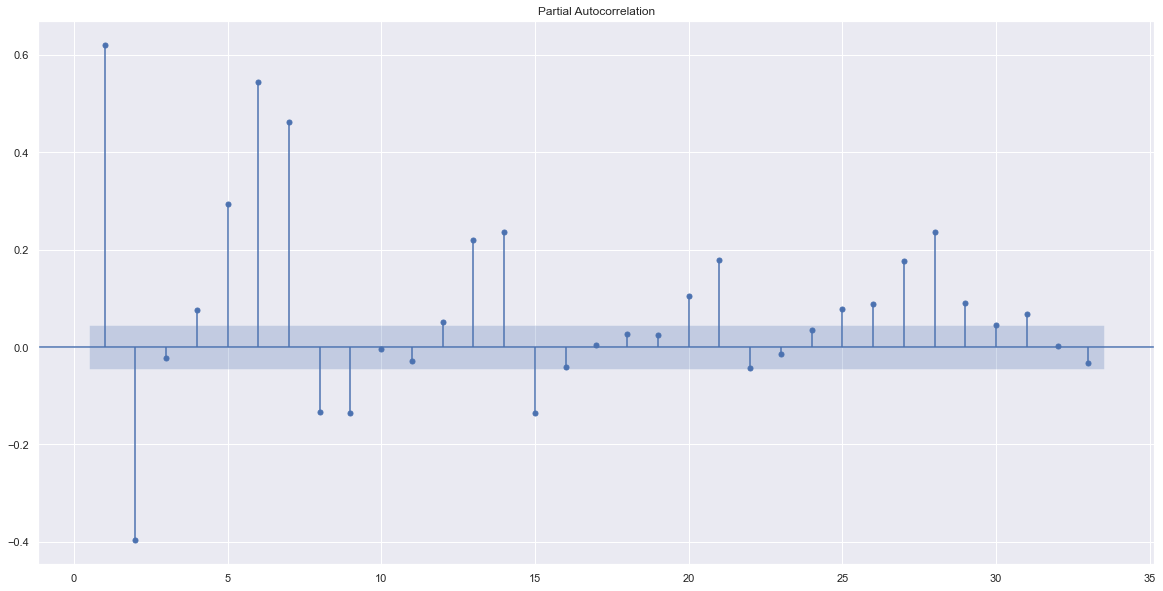

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data_agg['sales'], zero = False)
plt.show()
plot_pacf(data_agg['sales'], zero = False)
plt.show()